In this work, I will use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

## 1 - Implementing $K$-means

The K-means algorithm is a method to automatically cluster similar
data points together. 
* The interative procedure of $K$-means is as follows:
    * (1) Guess the initial $K$ centroids
    * (2) Refine this guess by repeatedly assigning examples to their closet centroids
    * (3) Recompute the centroids based on the assignments until the loss function no longer exhibits significant reduction

In [2]:
class Run_KMeans():

    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.m, self.n = X.shape # dimension of data
        self.centroids = np.zeros((K, self.n))
        self.idx = np.zeros(self.m, dtype=int) # an array used to record the centroid memberships
    
    # 1.1 Guessing the initial K centroids
    # shuffle the dataset randomly and choose the first K samples
    # as the initial centroids.   
    def _kMeans_init_centroids(self):
        """
        This function initializes K centroids that are to be 
        used in K-Means on the dataset X   
        Returns:
            centroids (ndarray): Initialized centroids
        """    
        # Randomly reorder the indices of examples
        randidx = np.random.permutation(self.m)    
        # Take the first K examples as centroids
        self.centroids = self.X[randidx[:self.K]]   

    # 1.2 Finding closest centroids
    # Firstly, the algorithm assigns every training example to its closest
    # centroid, given the current positions of centroids.  
    def _find_closest_centroids(self):
        """
        Computes the centroid memberships for every example
        Returns:
            idx (array_like): (m,) closest centroids
        """
        for i in range(self.m):
            distance = [] # Array to hold distance between X[i] and each centroids[j]
            for j in range(self.K):
                norm_ij = np.linalg.norm(self.X[i] - self.centroids[j]) 
                distance.append(norm_ij)
            self.idx[i] = np.argmin(distance)    

    # 1.3 Computing centroid means
    # Given assignments of every point to a centroid, the second phase of the
    # algorithm recomputes, for each centroid, the mean of the points that
    # were assigned to it.
    def _compute_centroids(self):
        """
        Returns the new centroids by computing the means of the 
        data points assigned to each centroid. 
        Returns:
            centroids (ndarray): (K, n) New centroids computed
        """
        for k in range(self.K):
            points_k = self.X[self.idx==k]
            self.centroids[k] = np.mean(points_k, axis = 0)

    # running the whole K-means algorithem
    def run_kMeans(self, max_iters=10):
        """
        Runs the K-Means algorithm on data matrix X, where each row of X
        is a single example
        """
        self._kMeans_init_centroids() # Initialize K centroids   
        
        for i in range(max_iters): # Run K-Means       
            print("K-Means iteration %d/%d" % (i, max_iters-1))  #Output progress
            # For each example in X, assign it to the closest centroid
            self._find_closest_centroids()             
            # Given the memberships, update centroids
            self._compute_centroids()

## 2. Dataset

### 2.1 Load image

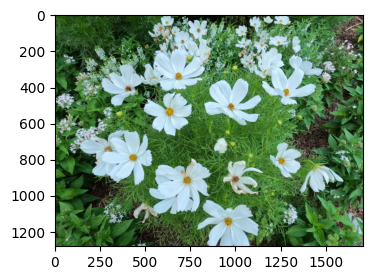

In [3]:
original_img = plt.imread('Lovely little white flowers.JPG') # using matplotlib to read an image
original_img = original_img / 255
plt.figure(figsize=(4,3))
plt.imshow(original_img) # using matplotlib to read an image

### 2.2 Processing data

In [4]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1280, 1707, 3)


In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.

The orginal image contains thousands of colors, and in this work, I will reduce the number of colors to 10 colors.
Concretely, I will treat every pixel in the original image as a data example and use the K-means algorithm to find the 10 colors that best group (cluster) the pixels in the 3- dimensional RGB space. To call the `run_kMeans`, I need to first transform the matrix `original_img` into a two-dimensional matrix.

The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=2184960 = 1280\times1707$)

In [5]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [6]:
X_img.shape

(2184960, 3)

## 3. K-Means on Image Pixels

In [7]:
# Run K-Means algorithm on this data
K = 10
max_iters = 20
run_km = Run_KMeans(X_img, K)
run_km.run_kMeans(max_iters = max_iters)

K-Means iteration 0/19
K-Means iteration 1/19
K-Means iteration 2/19
K-Means iteration 3/19
K-Means iteration 4/19
K-Means iteration 5/19
K-Means iteration 6/19
K-Means iteration 7/19
K-Means iteration 8/19
K-Means iteration 9/19
K-Means iteration 10/19
K-Means iteration 11/19
K-Means iteration 12/19
K-Means iteration 13/19
K-Means iteration 14/19
K-Means iteration 15/19
K-Means iteration 16/19
K-Means iteration 17/19
K-Means iteration 18/19
K-Means iteration 19/19


The code below will plot all the colors found in the original image. The color of each pixel is represented by RGB values so the plot have 3 axes -- R, G, and B. The red markers represent the 10 centroids after running K-means. 

In [8]:
def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=200, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    #ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

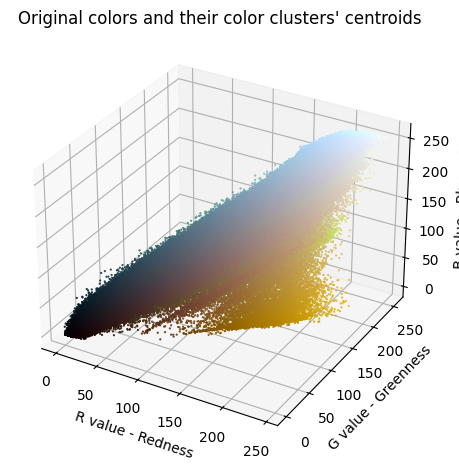

In [9]:
plot_kMeans_RGB(X_img, run_km.centroids, run_km.idx, K)

We can visualize the colors of each of the centroids above with the function below. The number below each color is its index and these are the numbers in the `idx` array.

In [10]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(12, 12))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

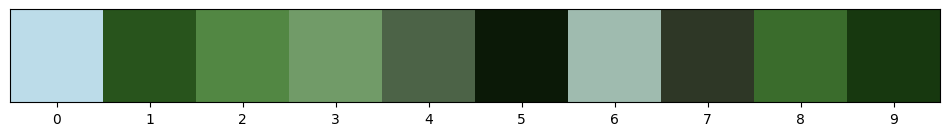

In [11]:
show_centroid_colors(run_km.centroids)

## 4. Compressing the Image

After finding the top $K=10$ colors to represent the image, we can now
represent the original image using the centroid assignments of each pixel. 
* The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $128\times128$ pixel locations, resulting in total size of $1280 \times 1707 \times 24 = 52,439,040$ bits. 
* The new representation requires some overhead storage in form of a dictionary of 10 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
* The final number of bits used is therefore $10 \times 24 + 1280 \times 1707 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [12]:
# Replace each pixel with the color of the closest centroid
X_recovered = run_km.centroids[run_km.idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

View the effects of the compression by reconstructing the image based only on the centroid assignments. Even though the resulting image retains most of the characteristics of the original,There are still some compression artifacts because of the fewer colors used.

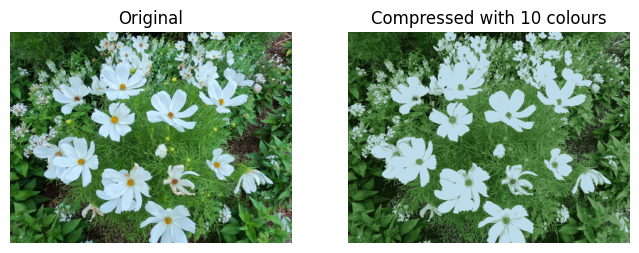

In [13]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()